In [19]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, optimizers, backend, datasets
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [72]:
(xtrain, ytrain) , (xtest, ytest) = datasets.cifar10.load_data()

In [73]:
xtrain, xtest = xtrain/255.0, xtest/255.0

In [74]:
xtrain.shape

(50000, 32, 32, 3)

In [75]:
ytrain = tf.keras.utils.to_categorical(ytrain, 10)

In [76]:
ytest = tf.keras.utils.to_categorical(ytest, 10)

In [29]:
model = models.Sequential(
    [
        Conv2D(32, (3,3), activation = 'relu', input_shape = (32,32,3)),
        MaxPooling2D((2,2)),
        Conv2D(64, (3,3), activation = 'relu'),
        MaxPooling2D((2,2)),
        Conv2D(64, (3,3), activation = 'relu'),
        Flatten(),
        Dense(64, activation = 'relu'),
        Dense(10, activation = 'softmax')
    ]
)

In [30]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [41]:
history = model.fit(xtrain, ytrain, epochs= 5, batch_size = 32, validation_data = (xtest, ytest))

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.6009 - loss: 0.1999 - val_accuracy: 0.6288 - val_loss: 0.1725
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.6803 - loss: 0.1541 - val_accuracy: 0.6920 - val_loss: 0.1481
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7259 - loss: 0.1345 - val_accuracy: 0.7082 - val_loss: 0.1402
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7588 - loss: 0.1193 - val_accuracy: 0.7008 - val_loss: 0.1437
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7776 - loss: 0.1097 - val_accuracy: 0.7200 - val_loss: 0.1391


In [42]:
test_loss, test_acc = model.evaluate(xtest, ytest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7280 - loss: 0.1361


In [43]:
test_loss

0.13909068703651428

In [44]:
test_acc

0.7200000286102295

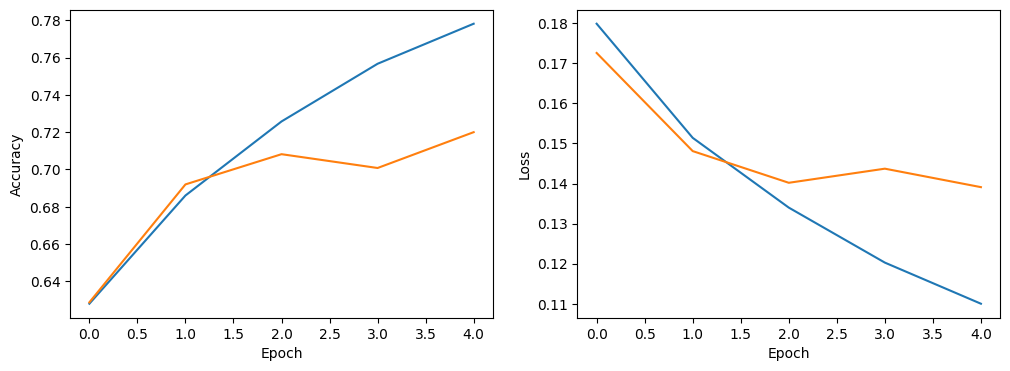

In [45]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [80]:
ytest = np.argmax(ytest, axis = 1)
ypred = model.predict(xtest)
ypred = np.argmax(ypred, axis = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


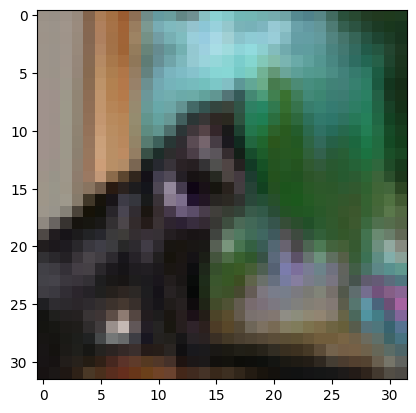

4 4


In [81]:
plt.imshow(xtrain[159])
plt.show()
print(ytest[159], ypred[159])